## CPSC-483-02 Assignment 2
## Name : Mohit Kumar
## Name : Ishee Gattani

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy.linalg import inv


## Question1 > Load and examine the Boston dataset’s features, target values, and description.

In [4]:
# Loadind Boston House pricing data
boston = load_boston()
# feature data to X
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# target data to Y
Y = pd.DataFrame(boston.target,columns=['MEDV'])
# describe The data set 
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
#Inspect the target values 
Y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [6]:
# Shape of data
X.shape, Y.shape

((506, 13), (506, 1))

In [7]:
# few head instances of the feature data
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# few head instance of the target data
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Question 2 Use sklearn.model_selection.train_test_split() to split the features and values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing.

In [9]:
# Splitting data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Question 3. Create a scatterplot of the training set showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear?

Text(0, 0.5, '(MEDV) Y axis')

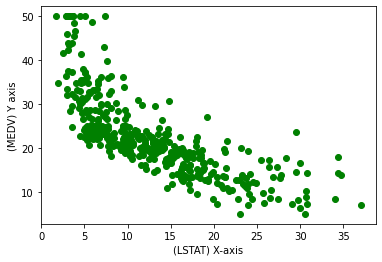

In [10]:
plt.scatter(x_train["LSTAT"], y_train["MEDV"], c='g')
plt.xlabel('(LSTAT) X-axis')
plt.ylabel('(MEDV) Y axis')

## Answer :Yes, LSTAT and MEDV are in Linear relationship upto a great degree with negative slope.

## Question:4 With LSTAT as X and MEDV as t, use np.linalg.inv() to compute w for the training set. What is the equation for MEDV as a linear function of LSTAT?

In [11]:
# Fitting Linear Regression model
X = x_train["LSTAT"].values.reshape(-1,1)
t = y_train["MEDV"].values.reshape(-1,1)
Lregressor = LinearRegression()
Lregressor.fit(X, t)

LinearRegression()

In [12]:
#retrieving the intercept:
print(Lregressor.intercept_)
w0 = Lregressor.intercept_

[34.76519272]


In [13]:
#retrieving the coef/slope:
print(Lregressor.coef_)
w1 = Lregressor.coef_

[[-0.95648761]]


In [14]:
print("MEDV = %f + (%f) * LSTAT" %(w0, w1))

MEDV = 34.765193 + (-0.956488) * LSTAT


### b. Computation of w using np.linalg.inv() 

In [15]:
X = x_train["LSTAT"]
t = y_train["MEDV"]

In [16]:
nxa = []
for elem in X:#Adding column of all 1's
    nxa.append([1, elem])
X = np.array(nxa)
t = np.array(t)
t = t.reshape(-1, 1)
X, t

(array([[ 1.  ,  9.71],
        [ 1.  ,  9.88],
        [ 1.  , 11.38],
        [ 1.  , 12.43],
        [ 1.  , 26.64],
        [ 1.  , 14.  ],
        [ 1.  ,  9.08],
        [ 1.  ,  8.67],
        [ 1.  ,  4.59],
        [ 1.  , 26.4 ],
        [ 1.  , 19.15],
        [ 1.  , 15.37],
        [ 1.  , 29.93],
        [ 1.  , 14.66],
        [ 1.  , 34.02],
        [ 1.  , 11.12],
        [ 1.  , 25.68],
        [ 1.  ,  3.16],
        [ 1.  ,  4.69],
        [ 1.  , 24.56],
        [ 1.  , 16.2 ],
        [ 1.  , 12.92],
        [ 1.  ,  9.97],
        [ 1.  , 17.58],
        [ 1.  ,  6.47],
        [ 1.  , 18.46],
        [ 1.  ,  9.22],
        [ 1.  ,  6.05],
        [ 1.  , 17.12],
        [ 1.  , 25.79],
        [ 1.  , 18.07],
        [ 1.  , 14.43],
        [ 1.  , 22.74],
        [ 1.  ,  4.81],
        [ 1.  , 10.88],
        [ 1.  , 26.82],
        [ 1.  ,  6.56],
        [ 1.  , 29.05],
        [ 1.  , 23.69],
        [ 1.  , 13.59],
        [ 1.  ,  5.04],
        [ 1.  , 

In [17]:
XT = X.T
XTX = np.dot(XT, X)

In [18]:
XTXINV = inv(XTX)
XTXINVXT = np.dot(XTXINV, XT)
W= np.dot(XTXINVXT, t)
W

array([[34.76519272],
       [-0.95648761]])

## Question5. Use w to add a line to your scatter plot from experiment (3). How well does the model appear to fit the training set?

Mean Squared Error on all training instances of Datasetusing LSAT feature: 36.523966406959666


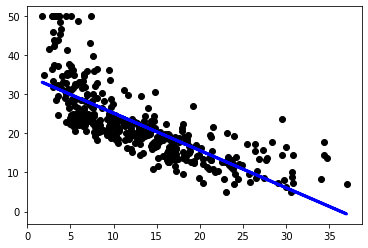

In [19]:
# Prediction on training set
X = x_train["LSTAT"].values.reshape(-1,1)
t = y_train["MEDV"].values.reshape(-1,1)

y_pred_train = Lregressor.predict(X)

print('Mean Squared Error on all training instances of Datasetusing LSAT feature:', metrics.mean_squared_error(t, y_pred_train))

plt.scatter(X, t,  color='black')
plt.plot(X, y_pred_train, color='blue', linewidth=3)
plt.show()

## Question6. Use w to find the response for each value of the LSTAT attribute in the test set, then compute the test MSE 𝓛 for the model.

Mean Squared Error on all test instances of Datasetusing LSAT feature: 46.33630536002592


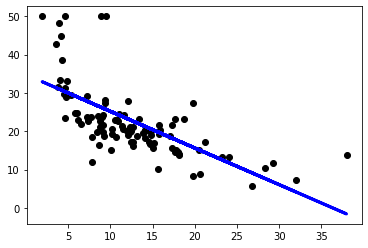

In [20]:
# Prediction on test set
xt=x_test["LSTAT"].values.reshape(-1,1)
yt=y_test["MEDV"].values.reshape(-1,1)
y_pred_test = Lregressor.predict(xt)

print('Mean Squared Error on all test instances of Datasetusing LSAT feature:', metrics.mean_squared_error(yt, y_pred_test))

plt.scatter(xt,yt,color='black')
plt.plot(xt, y_pred_test, color='blue', linewidth=3)
plt.show()

## Question 7: Now add an x2 column to LSTAT’s x column in the training set, then repeat experiments (4), (5), and (6) for MEDV as a quadratic function of LSTAT. Does the quadratic polynomial do a better job of predicting the values in the test set?

In [21]:
X_train = np.hstack((np.ones_like(X),X))
maxorder=1
for i in range(1,maxorder+1):
    X_train = np.hstack((X_train,X*X))
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), t)
w0=w[0]
w1=w[1]
w2=w[2]
print("MEDV = %f + (%f) * LSTAT +(%f) * LSTAT^2" %(w0, w1,w2))

MEDV = 43.109009 + (-2.366963) * LSTAT +(0.044633) * LSTAT^2


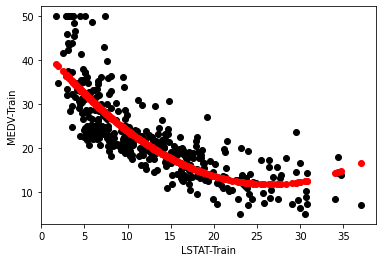

In [31]:
tPredictions = np.dot(X_train, w)
plt.scatter(x_train["LSTAT"], y_train["MEDV"], color='black')
plt.xlabel("LSTAT-Train")
plt.ylabel("MEDV-Train")
plt.plot(x_train["LSTAT"], tPredictions, 'ro')
plt.show()

In [30]:
XTest = x_test["LSTAT"]
tTest = y_test["MEDV"]
Xn = []
for elem in XTest:
    Xn.append([1, elem, elem ** 2])
XTest = np.array(Xn)
tTest = np.array(tTest)
tTest = tTest.reshape(-1, 1)
Pred = np.dot(XTest, w)
print('Mean Squared Error on all test instances of Datasetusing LSAT feature:', np.square(np.subtract(Pred, tTest)).mean())

Mean Squared Error on all test instances of Datasetusing LSAT feature: 38.846868661707184


## MSE reduces for test data so Polynomail order 2 is better fit than linear model

## Question 8: Repeat experiments (4) and (6) with all 13 input features as X and using np.linalg.lstsq(). Does adding additional features improve the performance on the test set compared to using only LSTAT?


In [ ]:
X = {}
X["column1"] = [1 for a in x_train["LSTAT"]]
for column in x_train:
    X[column] = x_train[column]
df = pd.DataFrame(X, columns = list(X.keys()))
XTrainALL = df.to_numpy()
#calculating weight for all the features present
FT = np.linalg.lstsq(XTrainALL, y_train, rcond=None)[0]
FT



In [ ]:
# Prediction on test set for alll the columns
Y = {}
Y["column1"] = [1 for a in x_test["LSTAT"]]

for column in x_test:
    Y[column] = x_test[column]
    
df = pd.DataFrame(Y, columns = list(Y.keys()))

X_Test, t_Test = df.to_numpy(), y_test
t_Test = np.array(t_Test).reshape(-1, 1)

Pred = np.dot(X_Test, FT)
print('Mean Squared Error on all test instances of Dataset using all feature:', metrics.mean_squared_error(t_Test, Pred))

### Answer: yes, adding additional features has improved the performance comparatively as MSE value is less

## Question 9: Now add x2 columns for all 13 features, and repeat experiment (8). Does adding quadratic features improve the performance on the test set compared to using only linear features?

In [ ]:
X1 = {}
X1["Column1"] = [1 for o in x_train["LSTAT"]]
for column in x_train:
    X1[column] = x_train[column]
    X1[column+"^2"] = x_train[column] ** 2
    
df = pd.DataFrame(X1, columns = list(X1.keys()))
df.head()

In [ ]:
X2Train = df.to_numpy()
w2 = np.linalg.lstsq(X2Train, y_train, rcond=None)[0]
w2, w2.shape


In [ ]:
X2 = {}
X2["column1"] = [1 for r in x_test["LSTAT"]]

for column in x_test:
    X2[column] = x_test[column]
    X2[column+"^2"] = x_test[column] ** 2
    
df = pd.DataFrame(X2, columns = list(X2.keys()))

X_Test, t_Test = df.to_numpy(), y_test


t_Test = np.array(t_Test).reshape(-1, 1)

Pred = np.dot(X_Test, w2)
print('Mean Squared Error on all test instances of Dataset adding quadratic feature:', metrics.mean_squared_error(t_Test, Pred))


### Answer: Yes adding quadratic features improve the performance on the test set compared to using only linear features, we can observe this with the decreased MSE value

## Question 10: Compute the training MSE for experiments (8) and (9) and compare it to the test MSE. What explains the difference?

In [ ]:
#Training MSE computation with all columns
Pred_t = np.dot(XTrainALL, FT)
y_Train = np.array(t).reshape(-1, 1)
print('Mean Squared Error on training data with all feature:', metrics.mean_squared_error(y_Train, Pred_t))


In [ ]:
#Training MSE computation with squared columns
Pred_2 = np.dot(X2Train, w2)
y_Train = np.array(t).reshape(-1, 1)
print('Mean Squared Error on training data with all squared feature:', metrics.mean_squared_error(y_Train, Pred_2))



### Answer: With increase in polynomial dgree the training loss decrease

## Question 11: Repeat experiments (9) and (10), adding x3 columns in addition to the existing x and x2 columns for each feature. Does the cubic polynomial do a better job of predicting the values in the training set? Does it do a better job of predicting the values in the test set?

In [ ]:
X = {}
X["Column1"] = [1 for a in x_train["LSTAT"]]
for column in x_train:
    X[column] = x_train[column]
    X[column+"^2"] = x_train[column] ** 2
    X[column+"^3"] = x_train[column] ** 3
df = pd.DataFrame(X, columns = list(X.keys()))
df.head()


In [ ]:
X_train3 = df.to_numpy()
w3= np.linalg.lstsq(X_train3, y_train, rcond=None)[0]
w3

In [ ]:
t_Train_Pred = np.dot(X_train3, w3)
y_Train3 = np.array(t).reshape(-1, 1)
print('Mean Squared Error on training data with all columns, squared and cubed columns :', metrics.mean_squared_error(y_Train3, t_Train_Pred))


In [ ]:
Xt = {}
Xt["coulmn1"] = [1 for a in x_test["LSTAT"]]

for column in x_test:
    Xt[column] = x_test[column]
    Xt[column+"^2"] = x_test[column] ** 2
    Xt[column+"^3"] = x_test[column] ** 3
    
df = pd.DataFrame(Xt, columns = list(Xt.keys()))

X_Test3, tTest = df.to_numpy(), y_test


tTest = np.array(tTest).reshape(-1, 1)

Pred3 = np.dot(X_Test3, w3)

print('Mean Squared Error on test data with all columns, squared and cubed columns ', metrics.mean_squared_error(tTest, Pred3))



### Answer: For test set it is better then comapred to liner model. But if we compare from quadratic the MSE value is high so it is not better then  dgree 2 polynomial. MSE for training data decreases when order of polynomial increases. 